In [21]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline
plt.rc('font', size = 11)
sns.set_style('darkgrid')

In [22]:
if os.path.exists("PoliceData.csv"):
    print('Dataset Found!')
else:
    print('Dataset not found. Now changing cwd to search for it.(will return back here if found in dataset folder)')
    os.chdir(str(Path(os.getcwd()).parent) + '\dataset')
data = pd.read_csv('PoliceData.csv')
data.head()

Dataset Found!


,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

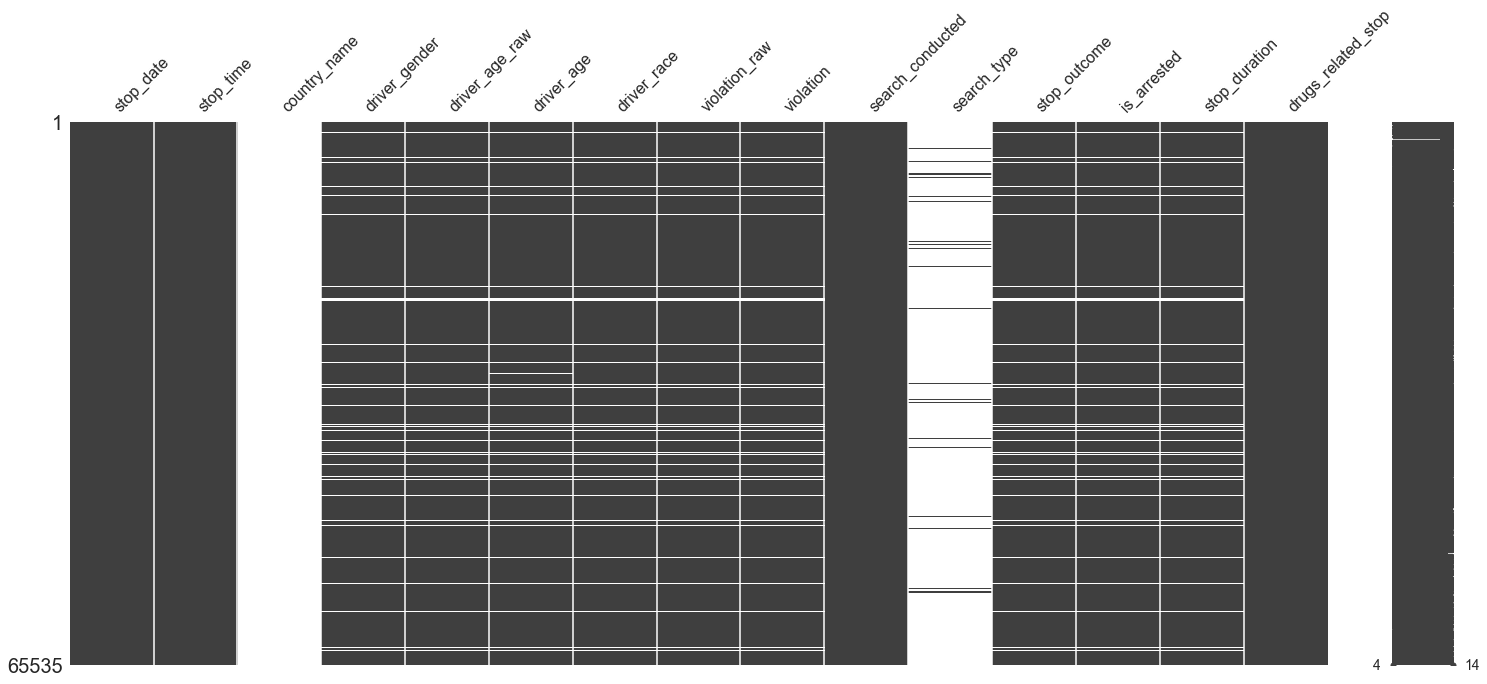

In [24]:
ms.matrix(data);

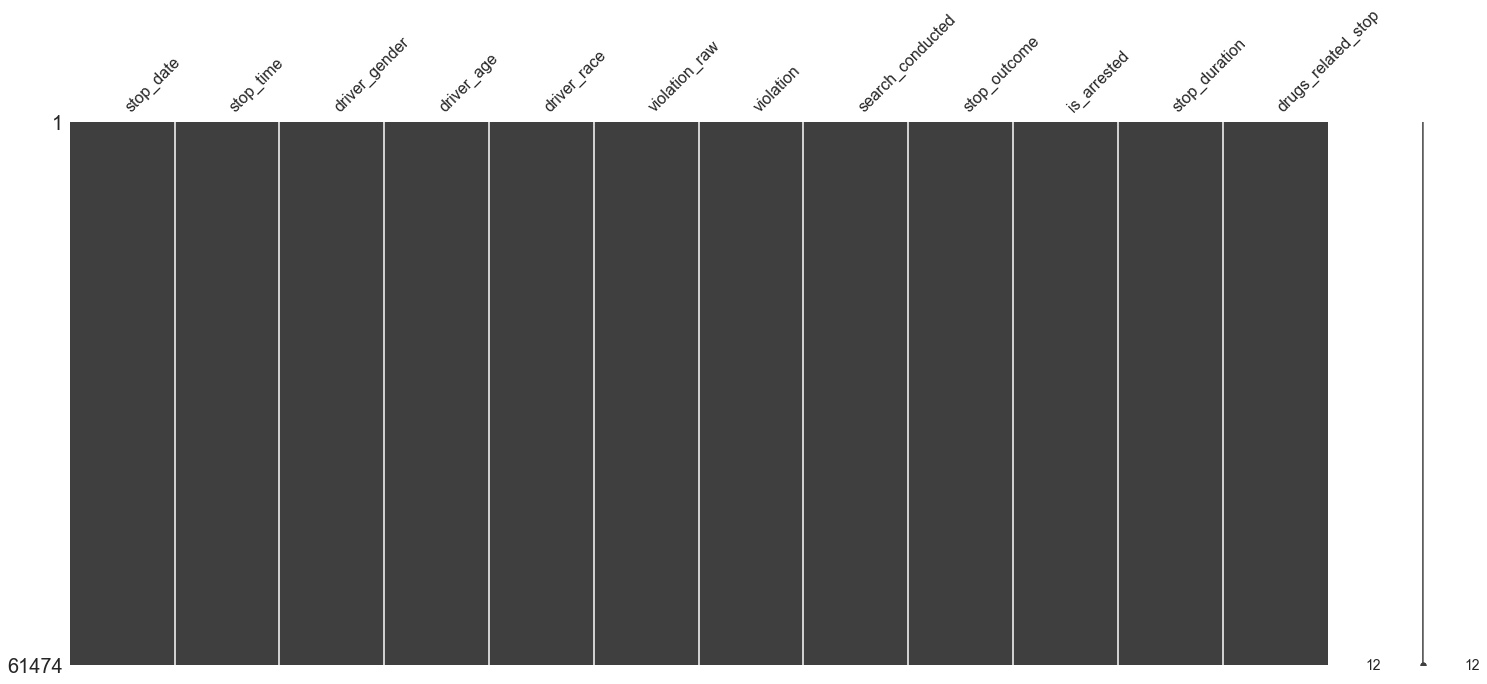

In [25]:
data.drop(columns = ['country_name','search_type','driver_age_raw'], inplace=True)
data.dropna(subset = ['driver_gender'], inplace = True)
data['driver_age'] = data['driver_age'].fillna(data.groupby('driver_gender')['driver_age'].transform('median'))
ms.matrix(data);

In [26]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


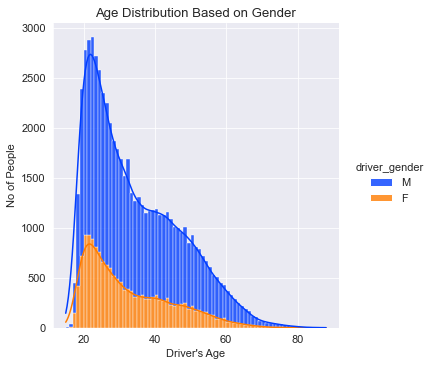

In [27]:
sns.displot(x = 'driver_age', hue = 'driver_gender', kde = True, data = data, 
            multiple = 'stack', alpha = 0.8, palette = "bright")
plt.title('Age Distribution Based on Gender')
plt.xlabel("Driver's Age")
plt.ylabel("No of People");

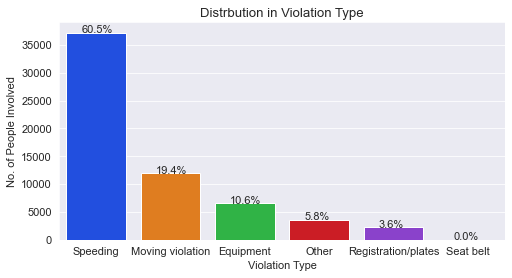

In [28]:
fig , ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(x = data.violation, data = data, order = data.violation.value_counts().index, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.violation))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title("Distrbution in Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("No. of People Involved");

In [29]:
pd.to_datetime(data['stop_time'])
data['stop_hour'] = pd.to_datetime(data['stop_time'], format = '%H:%M').dt.hour

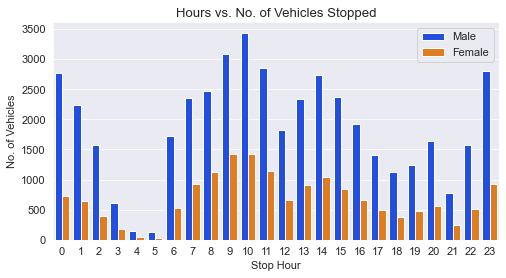

In [30]:
plt.figure(figsize = (8,4))
sns.countplot(x = data.stop_hour,data = data,hue = 'driver_gender', palette = "bright")
plt.title('Hours vs. No. of Vehicles Stopped')
plt.legend(['Male','Female'])
plt.xlabel("Stop Hour")
plt.ylabel("No. of Vehicles");

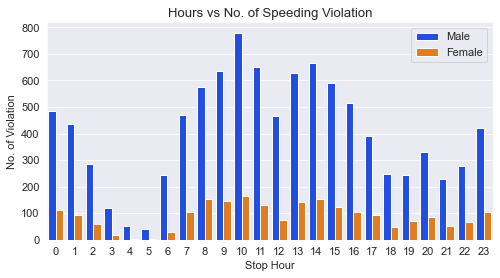

In [31]:
plt.figure(figsize = (8,4))
sns.countplot(x = data[data.violation == 'Moving violation'].stop_hour,data=data[data.violation == 'Moving violation'], 
              hue = 'driver_gender', palette = "bright")
plt.title('Hours vs No. of Speeding Violation')
plt.legend(['Male','Female'])
plt.xlabel("Stop Hour")
plt.ylabel("No. of Violation");

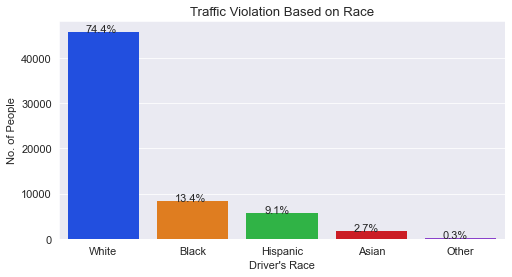

In [32]:
fig , ax = plt.subplots(figsize = (8,4))
ax = sns.countplot(x=data.driver_race, data=data, order = data.driver_race.value_counts().index,
                   linewidth = 0, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.driver_race))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title('Traffic Violation Based on Race')
plt.xlabel("Driver's Race")
plt.ylabel("No. of People");

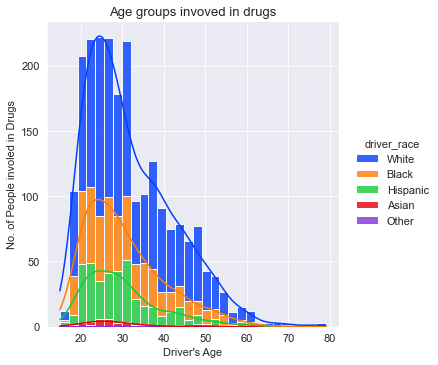

In [33]:
sns.displot(x='driver_age',data = data[data['is_arrested']==True],
            kde = True, hue = 'driver_race', multiple = "stack", alpha = 0.8, palette = "bright")
plt.title('Age groups invoved in drugs')
plt.xlabel("Driver's Age")
plt.ylabel("No. of People involed in Drugs");

In [34]:
data['stop_duration'].value_counts()
data['stop_duration'] = data['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':23,'30+ Min':45})
stop_duration_based_on_race = data.groupby('driver_race')[['stop_duration']].mean()

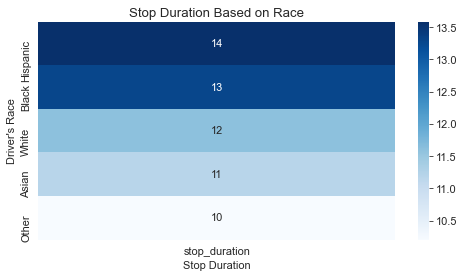

In [35]:
plt.figure(figsize = (8,4))
sns.heatmap(stop_duration_based_on_race.sort_values(by = ['stop_duration'],
                                                    ascending=False), annot = True, cmap = "Blues");
plt.title("Stop Duration Based on Race")
plt.xlabel("Stop Duration")
plt.ylabel("Driver's Race");

In [36]:
data['stop_date'] = pd.to_datetime(data['stop_date'])
data['stop_Year'] = pd.DatetimeIndex(data['stop_date']).year
yearly_data = data.groupby('stop_Year').sum()
yearly_data.reset_index(inplace = True)
yearly_data

,stop_Year,driver_age,search_conducted,stop_duration,drugs_related_stop,stop_hour
0,2005,81946.0,128,28174.5,18,30301
1,2006,333668.0,407,105684.0,59,119214
2,2007,295845.0,364,105780.5,67,105146
3,2008,281800.0,294,111778.0,57,93574
4,2009,254123.0,381,97894.0,84,82591
5,2010,247069.0,290,89983.5,61,79555
6,2011,264533.0,276,93694.5,64,86399
7,2012,339682.0,339,104765.0,108,116579


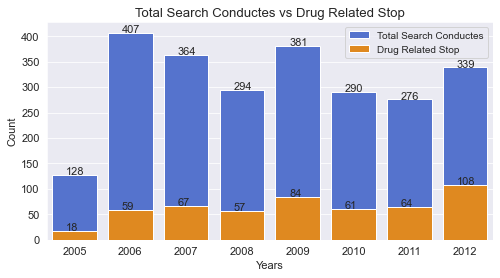

In [37]:
fig, ax = plt.subplots(figsize = (8,4))
sns.barplot(x = yearly_data.stop_Year, y = yearly_data.search_conducted,
            data = yearly_data,label = "Total Search Conductes", color = "royalblue")
sns.barplot(x = yearly_data.stop_Year, y = yearly_data.drugs_related_stop,
            data = yearly_data,label = "Drug Related Stop", color = "darkorange")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.55
    y = i.get_height()
    ax.annotate(count, (x, y))
ax.set_title("Total Search Conductes vs Drug Related Stop")
ax.set(xlabel = "Years", ylabel = "Count")
ax.legend(fontsize = '10');

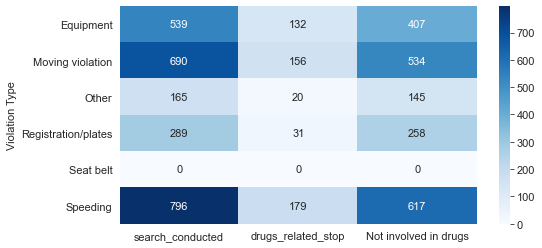

In [38]:
result = data.groupby('violation')[['search_conducted','drugs_related_stop','is_arrested']].sum()
result['Not involved in drugs'] = result['search_conducted']-result['drugs_related_stop']
plt.figure(figsize = (8,4))
sns.heatmap(result, annot = True, fmt = ".0f", cmap = "Blues");
plt.ylabel("Violation Type");

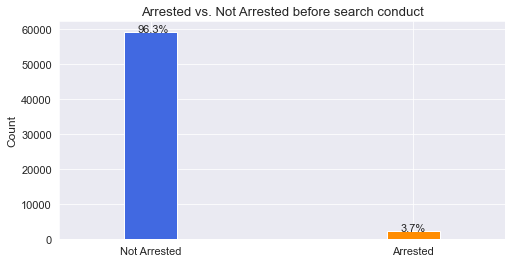

In [39]:
fig, ax = plt.subplots()
fig.canvas.draw()
data.is_arrested.value_counts().plot(kind="bar", width=0.2, figsize=(8, 4), color = ["royalblue","darkorange"])
plt.ylabel("Count", fontsize=12)
plt.title("Arrested vs. Not Arrested before search conduct")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(data.is_arrested))
    x = i.get_x() + i.get_width() - 0.15
    y = i.get_height()
    ax.annotate(percentage, (x, y))
ax.set_xticklabels(["Not Arrested","Arrested"], rotation = 0);

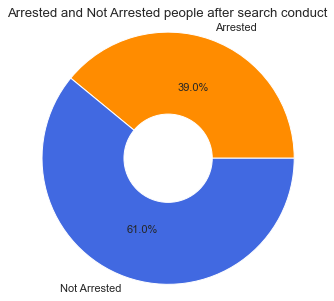

In [40]:
search_conducted = len(data[data.search_conducted == True])
arrested_after_search = len(data[(data.search_conducted == True) & (data.is_arrested == True)])
arrested = ((arrested_after_search/search_conducted)*100)
not_arrested = (100-(arrested))
fig, ax = plt.subplots(figsize = (5,5))
ax.pie([arrested, not_arrested], labels = ('Arrested','Not Arrested'),
       autopct = '%1.1f%%', colors = ["darkorange","royalblue"])
centre_circle = plt.Circle((0,0), 0.35, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Arrested and Not Arrested people after search conduct');
ax.axis('equal');